In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('data_mlr.xlsx',sheet_name="data")

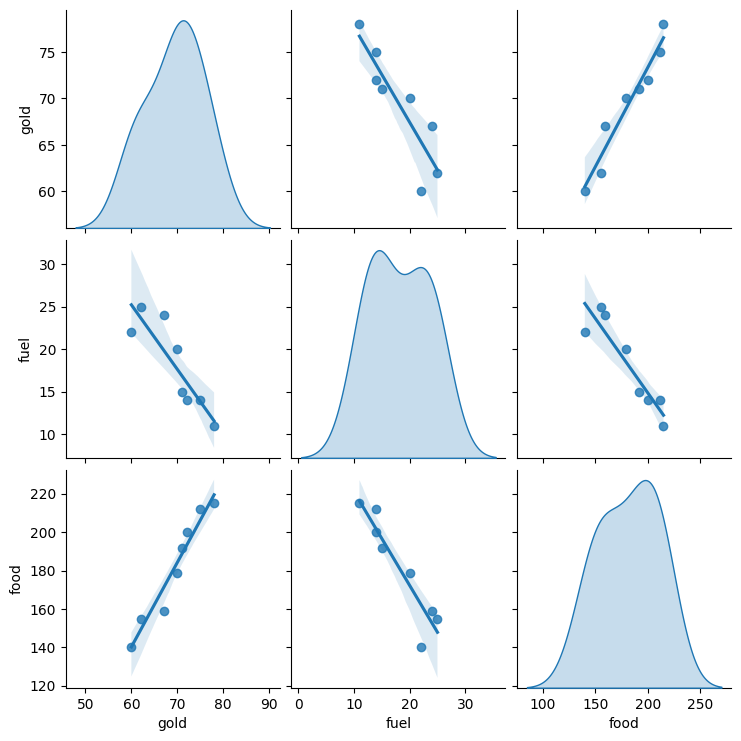

In [8]:
sns.pairplot(df[['gold','fuel','food']], 
             diag_kind='kde', kind='reg')
plt.show()

In [41]:
# Tập dữ liệu Input (đặc trưng) và Output (mục tiêu)
X = df[['gold','fuel']].values # explanatory = feature
y = df[['food']].values # reponse = target

# Đảm bảo dữ liệu là kiểu số thực
X = X.astype(float)
y = y.astype(float)

In [42]:
# Cross Validation
# Chia tách ra training (huấn luyện) và testing (kiểm thử)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, 
                                                    random_state=16)


In [43]:
X_train

array([[72., 14.],
       [78., 11.],
       [75., 14.],
       [62., 25.]])

In [44]:
y_train

array([[200.],
       [215.],
       [212.],
       [155.]])

In [45]:
X_test

array([[67., 24.],
       [71., 15.],
       [60., 22.],
       [70., 20.]])

In [46]:
y_test

array([[159.],
       [192.],
       [140.],
       [179.]])

In [47]:
# Xây dựng mô hình hồi quy tuyến tính đơn biến: ProfitRate = f(TimeAds)
# ProfitRate = A0 + A1*TimeAds + epsilon
from sklearn import linear_model

In [48]:
# Khai báo mô hình SLR
model = linear_model.LinearRegression()


In [49]:
# Huấn luyện mô hình 
model.fit(X_train,y_train)

LinearRegression()

In [50]:
import numpy as np
from sklearn import metrics

# Tính giá trị dự báo ProfitRate dựa trên dữ liệu TimeAds của tập test
y_test_pred = model.predict(X_test)

In [51]:
print('Score or R-Squared:', model.score(X_test, y_test))

Score or R-Squared: 0.7275274559110105


In [52]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:', 
      metrics.mean_absolute_percentage_error(y_test, y_test_pred))


Mean Absolute Error: 9.07194244604316
Root Mean Squared Error: 10.311760777419543
Mean Absolute Percentage Error: 0.05851499177188535


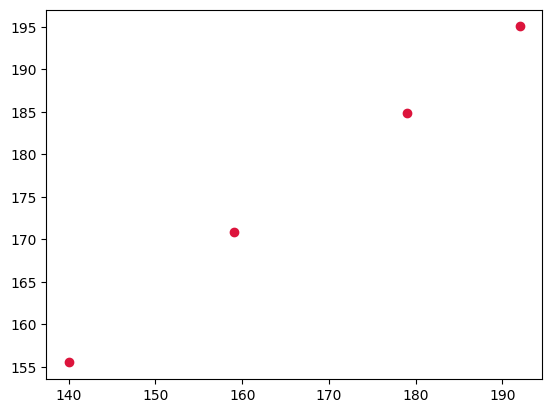

In [53]:
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred, c='crimson')

In [54]:
p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))

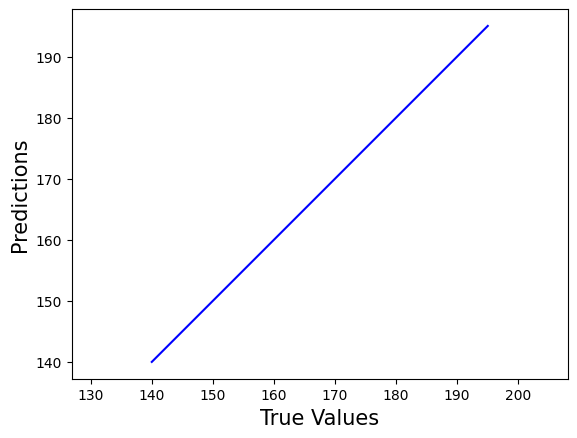

In [55]:
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [56]:
# (Train data set) Vẽ residual bằng Python
sns.residplot(x=X_train, y=y_train)
plt.show()

ValueError: regplot inputs must be 1d

In [28]:
import pickle
pickle.dump(model, open('model1.csv', 'wb'))

In [29]:
X = df[['gold', 'fuel']]
y = df['food']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
predictions = model.predict(X_test)

In [40]:
for i in range(len(predictions)):
    print(f'Dự đoán giá food: {predictions[i]:.2f}, Giá thực tế: {y_test.iloc[i]:.2f}')

Dự đoán giá food: 142.24, Giá thực tế: 155.00
Dự đoán giá food: 195.62, Giá thực tế: 200.00
